In [534]:
import pandas as pd
import numpy as np

shark_data_unclean = pd.read_csv('data_with_geo_weather.csv', encoding = "ISO-8859-1")

In [535]:
shark_data_unclean = shark_data_unclean.drop("Unnamed: 0" , 1)
shark_data_unclean['Age'] = pd.to_numeric(shark_data_unclean['Age'], errors='coerce')
shark_data_unclean['Time'] = pd.to_numeric(shark_data_unclean['Time'], errors='coerce')
shark_data_unclean

,Date,Type,Activity,Sex,Age,Injury,Fatal (Y/N),Time,Species,Proper_date,Full Location,latitude,longitude,avg_temp,precipitation,wind_speed,sea_level_pressure
0,09-Sep-2021,Unprovoked,surfing,M,6.0,Minor injury to right arm,N,1320.0,Not Determined,09-Sep-2021,"USA Florida Ponce Inlet, Volusia County",29.096373,-80.936998,26.1,1.0,16.2,1012.5
1,05-Sep-2021,Unprovoked,surfing,M,31.0,FATAL,Y,1030.0,White xhark,05-Sep-2021,AUSTRALIA New South Wales Emerald Beach,-30.157479,153.150195,13.6,4.6,20.4,1017.3
2,28-Aug-2021,Unprovoked,boarding,M,NaN,Lacerations both sides of lower leg immediatel...,N,1145.0,Not Determined,28-Aug-2021,"USA Texas Galveston Island, Galveston County",29.241005,-94.909133,29.4,2.5,10.4,1013.7
3,03-Sep-2021,Unprovoked,fell,M,64.0,Severe injury to leg,N,1400.0,Not Determined,03-Sep-2021,USA Louisiana off Grand Isle,29.236617,-89.987294,27.2,3.9,5.1,1014.6
4,21-Aug-2021,Unprovoked,surfing,M,41.0,Left ankle and foot bitten,N,640.0,Bull shark,21-Aug-2021,"USA Florida Walton Beach Psrk, St. Lucie County",27.337890,-80.233431,28.9,0.2,11.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,05-Sep-1900,Unprovoked,floating,M,NaN,"Bathing suit torn & ""imprints of the shark's t...",N,1800.0,Not Determined,05-Sep-1900,"USA Hawaii Waikiki Beach, Oahu",21.279346,-157.829185,NaN,NaN,NaN,NaN
4271,21-Aug-1900,Unprovoked,bathing,M,NaN,Left hand lacerated,N,1800.0,Not Determined,21-Aug-1900,"USA North Carolina Southport, Brunswick County",33.918209,-78.019301,NaN,NaN,NaN,NaN
4272,31-Jul-1900,Unprovoked,swimming,M,NaN,FATAL,Y,9999.0,Not Determined,31-Jul-1900,"CROATIA Primorje-Gorski Kotar County Volosko,...",45.350000,14.316667,NaN,NaN,NaN,NaN
4273,Late Jul-1900,Provoked,NaN,Not Determined,NaN,"No injury to occupants. They shot shark, then ...",N,9999.0,Not Determined,Late Jul-1900,"USA Connecticut Bridgeport, Fairfield County",41.179226,-73.189438,NaN,NaN,NaN,NaN


In [536]:
shark_data_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4275 entries, 0 to 4274
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4275 non-null   object 
 1   Type                4275 non-null   object 
 2   Activity            4107 non-null   object 
 3   Sex                 4275 non-null   object 
 4   Age                 3048 non-null   float64
 5   Injury              4275 non-null   object 
 6   Fatal (Y/N)         4275 non-null   object 
 7   Time                4274 non-null   float64
 8   Species             4275 non-null   object 
 9   Proper_date         4275 non-null   object 
 10  Full Location       4275 non-null   object 
 11  latitude            4275 non-null   float64
 12  longitude           4275 non-null   float64
 13  avg_temp            1668 non-null   float64
 14  precipitation       2118 non-null   float64
 15  wind_speed          1417 non-null   float64
 16  sea_le

In [537]:
shark_data_unclean.columns

Index(['Date', 'Type', 'Activity', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)',
       'Time', 'Species ', 'Proper_date', 'Full Location', 'latitude',
       'longitude', 'avg_temp', 'precipitation', 'wind_speed',
       'sea_level_pressure'],
      dtype='object')

In [538]:
shark_data_unclean = shark_data_unclean[["Type", "Activity", "Fatal (Y/N)", "Sex ", "wind_speed", "Time"]]
shark_data_unclean = shark_data_unclean.dropna()

shark_data_unclean['Activity'] = pd.factorize(shark_data_unclean['Activity'])[0] 
shark_data_unclean['Fatal (Y/N)'] = pd.factorize(shark_data_unclean['Fatal (Y/N)'])[0] 
shark_data_unclean['Sex '] = pd.factorize(shark_data_unclean['Sex '])[0] 
shark_data_unclean['wind_speed'] = pd.factorize(shark_data_unclean['wind_speed'])[0] 
shark_data_unclean['Time'] = pd.factorize(shark_data_unclean['Time'])[0] 
#shark_data_unclean['Age'] = pd.factorize(shark_data_unclean['Age'])[0] 


#shark_data_unclean['sea_level_pressure'] = pd.factorize(shark_data_unclean['sea_level_pressure'])[0] 

shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Unprovoked", '0')
shark_data_unclean['Type'] = shark_data_unclean['Type'].str.replace("Provoked", '1')

shark_data_unclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 0 to 3812
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Type         1357 non-null   object
 1   Activity     1357 non-null   int64 
 2   Fatal (Y/N)  1357 non-null   int64 
 3   Sex          1357 non-null   int64 
 4   wind_speed   1357 non-null   int64 
 5   Time         1357 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 74.2+ KB


In [556]:
from sklearn.preprocessing import MinMaxScaler

df = shark_data_unclean.copy(deep=True)
X = df.drop("Type", axis=1)
y = df["Type"]

In [557]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
    
    tree_clf = DecisionTreeClassifier(max_depth=4, criterion="gini", random_state=42)
    tree_clf.fit(X_train, y_train)

    y_pred = tree_clf.predict(X_test)

    target_names = ['Unprovoked', 'Provoked']
    column_names = df.drop(['Type'], axis=1).columns

    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


Avg unprovoked precision:  0.9498003558832038
Avg provoked precision:  0.7163030429605014


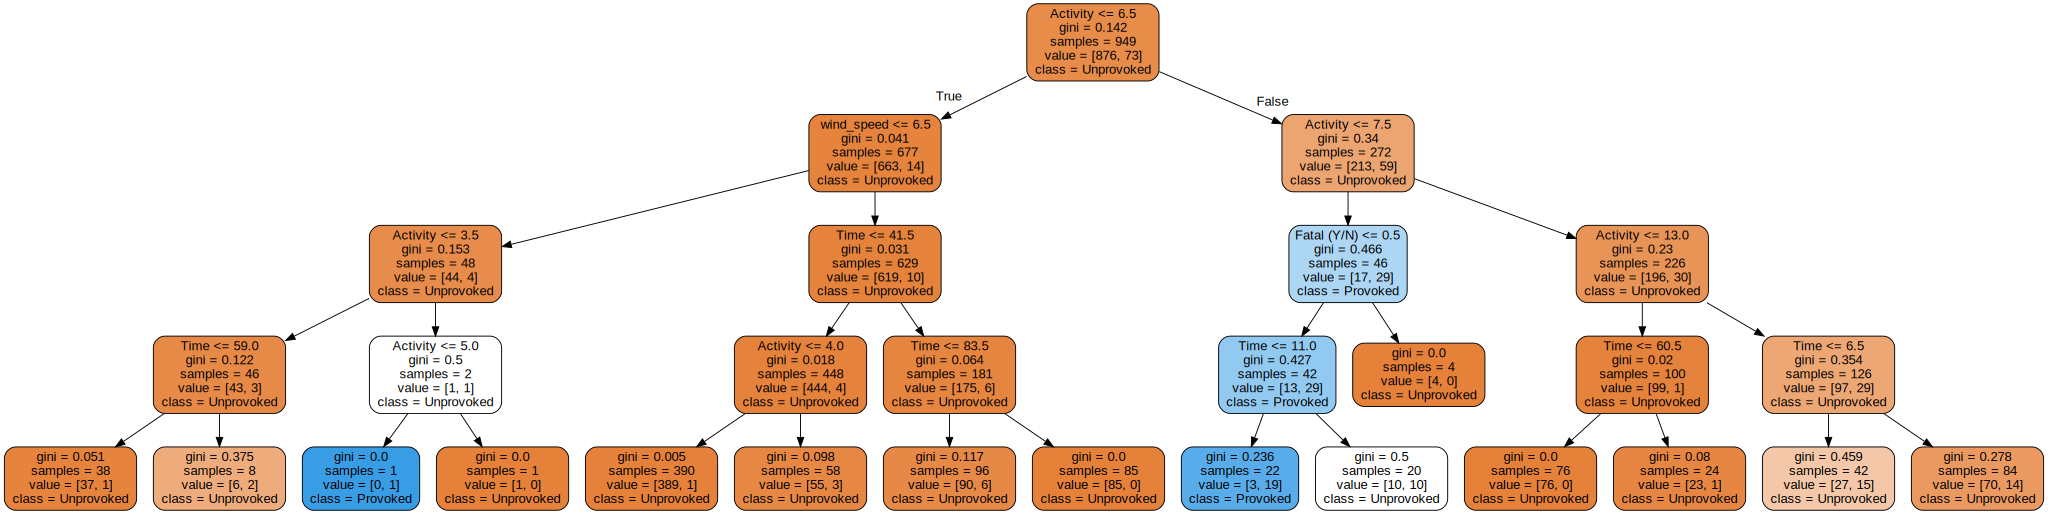

In [558]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=("shark_attack_tree.dot"),
        feature_names=column_names,
        class_names=target_names,
        rounded=True,
        filled=True
    )

Source.from_file("shark_attack_tree.dot")

In [549]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = GaussianNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

Avg unprovoked precision:  0.9289340101522874
Avg provoked precision:  0.2857142857142851


In [550]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):
    naive_bayes = MultinomialNB()
    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

Avg unprovoked precision:  0.9436201780415463
Avg provoked precision:  0.18309859154929595


In [551]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 200

for i in range(num_times):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    clf = KNeighborsClassifier(n_neighbors = 20)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Avg unprovoked precision:  0.9240293876145554
Avg provoked precision:  0.3099166666666666


E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

In [552]:
from sklearn.ensemble import RandomForestClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 10
num_tests = 5

for i in range(1, num_tests):
    total_precision_un = 0
    total_precision_p = 0
    for j in range(num_times):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.fit_transform(X_test)
        
        clf = RandomForestClassifier(n_estimators = 100*i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
        total_precision_un += result_metrics["Unprovoked"]["precision"]
        total_precision_p += result_metrics["Provoked"]["precision"]

    print("Avg unprovoked precision: ", total_precision_un / num_times)
    print("Avg provoked precision: ", total_precision_p / num_times)
    print()

Avg unprovoked precision:  0.9303320238212116
Avg provoked precision:  0.24892408245349423

Avg unprovoked precision:  0.9461833355462559
Avg provoked precision:  0.4841025641025641

Avg unprovoked precision:  0.9407301076606631
Avg provoked precision:  0.3732225617519735

Avg unprovoked precision:  0.9465562316780556
Avg provoked precision:  0.578665452194864



In [555]:
from sklearn.neural_network import MLPClassifier

total_precision_un = 0
total_precision_p = 0
num_times = 10

for i in range(num_times):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    clf = MLPClassifier(random_state=42, solver='lbfgs', max_iter=200)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    result_metrics = classification_report(y_test, y_pred, target_names=target_names, output_dict = True)
    total_precision_un += result_metrics["Unprovoked"]["precision"]
    total_precision_p += result_metrics["Provoked"]["precision"]

print("Avg unprovoked precision: ", total_precision_un / num_times)
print("Avg provoked precision: ", total_precision_p / num_times)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

Avg unprovoked precision:  0.9348846089964263
Avg provoked precision:  0.34994939271255066


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
